In [2]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
import gensim.downloader as api
import numpy as np
from nltk.tokenize import word_tokenize

# Load pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

def preprocess_text(text):
    """
    Tokenizes and cleans the input text.
    Removes punctuation and converts to lowercase.
    """
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Keep only alphabetic words
    return tokens

def get_average_word_vector(tokens, model):
    """
    Computes the average Word2Vec vector for a list of tokens (words).
    """
    word_vectors = []
    for word in tokens:
        if word in model.key_to_index:  # Check if the word exists in the model
            word_vectors.append(model[word])

    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Average of word vectors
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no valid words are found

def calculate_cosine_similarity(doc1, doc2, model):
    """
    Calculates the cosine similarity between two documents using Word2Vec embeddings.
    """
    # Preprocess and tokenize the documents
    tokens_doc1 = preprocess_text(doc1)
    tokens_doc2 = preprocess_text(doc2)

    # Get average Word2Vec vector for each document
    vector_doc1 = get_average_word_vector(tokens_doc1, model)
    vector_doc2 = get_average_word_vector(tokens_doc2, model)

    # Compute cosine similarity
    cosine_sim = np.dot(vector_doc1, vector_doc2) / (np.linalg.norm(vector_doc1) * np.linalg.norm(vector_doc2))
    return cosine_sim

def calculate_similarities(abstracts, model):
    """
    Calculates the cosine similarity between each pair of abstracts in the list.

    Args:
    - abstracts: List of text abstracts (strings).
    - model: Pre-trained Word2Vec model.

    Returns:
    - similarity_matrix: A 2D numpy array of cosine similarity values.
    """
    num_abstracts = len(abstracts)
    similarity_matrix = np.zeros((num_abstracts, num_abstracts))

    for i in range(num_abstracts):
        for j in range(i, num_abstracts):
            similarity = calculate_cosine_similarity(abstracts[i], abstracts[j], model)
            similarity_matrix[i, j] = similarity_matrix[j, i] = similarity  # Fill both sides of the matrix

    return similarity_matrix

# Example usage
abstracts = [
    """BPJS Kesehatan plays a crucial role in providing affordable access to healthcare services and reducing individual financial burdens. However, deficit issues can disrupt the sustainability of the program, making anomaly detection highly important to conduct.
    Previous research on unsupervised anomaly detection in BPJS Kesehatan revealed a limitation with Simple Linear Regression (SLR), which only accommodates linear relationships among independent variables and the target variable of BPJS Kesehatan claim values.
    Minister of Health Regulation No. 52 of 2016 identified eight influential non-linear independent variables, leading to the proposal of Support Vector Regression (SVR) to address SLR's shortcomings.
    Research findings demonstrate SVR's superior anomaly detection performance over SLR. Interestingly, the SVR model excels in anomaly detection but lacks in prediction.
    Optimal tuning of SVR hyperparameters (C=9, epsilon=90, gamma=0.009, residual anomaly definition > 0.5*RMSE for both datasets) yields impressive metrics: Accuracy=0.97, Precision=0.84, Recall=0.97, and F1-Score=0.90. The anomaly detection results are expected to greatly support the sustainability of the BPJS Kesehatan program in Indonesia.""",

    """There are many aspects of readiness that must be considered when implementing technological breakthroughs, the business sector is still relatively slow in adopting blockchain technology. However, considering that blockchain technology is still in its early stages of development and has many potential applications, it is necessary to conduct empirical studies on the factors influencing its application in the industry.
    The problem of this study is to develop an appropriate framework based on how well its features match the needs of the business sector. This research method uses data collection using online questionnaires to obtain information from 86 respondents. The current study also utilizes the Smart PLS 4 model to produce a structural hypothetical model. The results of this study find a significant influence on Revolutionary Innovation by enriching the literature on the relationship between Blockchain, Big Data and the Business Sector, which is expanded by adding new variables.
    The novelty of this research identifies potential utilization, analyzes internal and external factors, and identifies how blockchain disrupts the business sector. The purpose of this study is to assess how blockchain technology is currently used in the business sector for data provision as a theoretical information technology innovation",
    "Exploring the potential of machine learning in medical diagnostics.""",

    """ The internet of things generates various types of data traffic with a very large amount of data traffic which has an impact on security issues, one of which is an attack on the Internet of Things network.
    In the IoT data traffic flow, which contains various data, it turns out that the portion of attack data traffic is usually smaller than normal traffic. Therefore, the attack detection method must be able to recognize the type of attack on a very large data traffic flow and unbalanced data.
    High data dimensions and unbalanced data are one of the challenges in detecting attacks. To overcome the large data dimensions, Chi-square was chosen as a feature selection technique. In this study, the ensemble method is proposed to improve the ability to detect anomalies in unbalanced data. To produce an ideal detection method, a combination of several classification algorithms such as Bayes Network, Naive Bayes, REPtree and J48 is used. The CICIDS-2017 dataset is used as experimental data because it has a high data dimension which contains unbalanced data. The test results show that the proposed Ensemble method can improve the performance of anomaly detection for high-dimensional data containing unbalanced data""" ,

    """ Buses are one of the most widely chosen transportation methods to support the mobility of the Indonesian people. Mobility that is often found in addition to public transportation, is also often found in the mobility of tourism tour activities for a travel group.
    The number of tourist destinations to which passengers go up and down makes the assistant bus driver or group leader work hard to ensure that the number of passengers boarding the bus matches the number of groups. It often takes a long time to ensure the accuracy of the number of passengers before departure to the next destination. This conventional method results in the delay of the tourism tour schedule. In this research, the author designs a webcam-based bus passenger face detection system using the Single Shot Detector (SSD) method that can provide real-time information to bus drivers, assistant bus drivers or group leaders.
    The results obtained by the system obtained an achievement of 95% of the total system creation along with testing the detection of bus passenger faces in actual conditions resulted in an average accuracy of 77.5%.""" ,

    """ Indonesia is a country with a unique geography. The confluence of three tectonic plates located in the country results in frequent natural disasters, from earthquakes to volcanic activity. BMKG is a monitoring agency tasked with providing information related to these natural disasters.
    However, one type of natural disaster data, the SIGMET data (Significant Meteorological Information) used to provide information on volcanic ash, has a complicated format that is difficult for ordinary people to understand. Therefore, this research seeks to make finding information related to volcanic ash and volcanic eruptions in Indonesia easier in terms of access and comprehension.
    In this research, an application design will be carried out that can search SIGMET data by implementing natural language processing with a production rule base. The research results have an accuracy rate of 84% using 25 test sample sentences that combine sentences and words contained in the important words section.""" ,

    """ Digital money is the fundamental driving factor behind today's modern economy. Credit/debit cards, e-wallets, and other contactless payment options are widely available nowadays. This also raises the security risk associated with passwords in online transactions.
    One-time passwords (OTPs) are another option for mitigating this. A one-time password (OTP) serves as an additional password authentication or validation technique for each user authentication session. Failures in transmitting OTP passwords through SMS can arise owing to operator network faults or technological concerns.
    To minimize the risk value that arises in online transactions, it is necessary to evaluate the causality of the OTP SMS sending transaction status category by determining the main factors for successful OTP SMS sending and identifying the causes of failure when sending OTP SMS using the Bayesian Network method. According to data analysis, online transactions occur more frequently in the morning, with status summaries such as no delay, unknown status, and others. Furthermore, there is causality with at least three variables in the principal status summary, including no delay, uncertain summary, long delay, normal, likely operator issues, abnormal, and more. With a high accuracy rate of around 90% in forecasting the likelihood of recurrence.""" ,


    """ Despite the system previously utilizing optimal query configurations and database settings, the transaction table in the database, which is undergoing significant numerical increases and notable queries and updates on each line, has seen a drop in query speeds simultaneous with data growth.
    This situation arises due to an increase in disk space in the database tablespace, which results from block fragmentation. At times, database engines do not detect this problem, thereby overlooking it in the database recommendation engine.
    Lacking an understanding of the fundamental issue, database engineers need analysis and strategies to maintain the query speed of the transaction table in the relational database """ ,

    """ Sales is an activity or business selling a product or service. In this study, I took a case study on Kaggle. Sales problems at the company cause inventory to be very high or vice versa, causing a loss of sales because there are no items to sell. Inventory that is too high results in increased costs due to existing resources being inefficient. In the opposite condition, it will cause a product vacancy in the market.
    Using the Recurrent Neural Network (RNN) Algorithm, this study predicts sales. The data used is sales data in 2020 with the parameter Number of sales per day in the last four months.
    The results obtained through testing several training scenarios and testing the implementation of the algorithm, in this case, is the highest accuracy value of 96.92% in the network architecture of three input neuron layers, three hidden layer neurons, one output, division of training, and test data 70: 30, learning value rate of 0.9 and a maximum of 9000000 epochs """ ,

    """ The field of information technology requires software, which has significant issues. Quality and reliability improvement needs damage prediction. Tree-based algorithms like Random Forest, Deep Forest, and Decision Tree offer potential in this domain. However, proper hyperparameter configuration is crucial for optimal outcomes.
    This study demonstrates the use of Random Search Hyperparameter Setting Technique to predict software defects, improving damage estimation accuracy. Using ReLink datasets, we found effective algorithm parameters for predicting software damage.
    Decision Tree, Random Forest, and Deep Forest achieved an average AUC of 0.73 with Random Search. Random Search outperformed other tree-based algorithms. The main contribution is the innovative Random Search hyperparameter tuning, particularly for Random Forest. Random Search has distinct advantages over other tree-based algorithms """,

    """ Drone object detection is one of the main applications of image processing technology and pattern recognition using deep learning. However, the limited drone image data that can be accessed for training detection algorithms is a challenge developing drone object detection technology. Therefore, many studies have been conducted to increase the amount of drone image data using data augmentation techniques. This study aims to evaluate the effect of data augmentation on deep learning accuracy in drone object detection using the YOLOv5 algorithm. The methods used in this research include collecting drone image data, augmenting data with rotate, crop, and cutout, training the YOLOv5 algorithm with and without data augmentation, as well as testing and analyzing training results.
The results of the study show that data augmentation can't improve the accuracy of the YOLOv5 algorithm in drone object detection. Evidenced by the decreasing value of precision and mAP@0.5 and the relatively constant value of recall and F-1 score. This is caused by too much augmentation, which can cause a loss of important information in the data and cause noise or distortion. """
]

# Calculate similarity matrix
similarity_matrix = calculate_similarities(abstracts, model)

# Display similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)


Cosine Similarity Matrix:
[[0.99999994 0.87373877 0.87019473 0.76072943 0.82986611 0.83870316
  0.8402673  0.83452511 0.85330766 0.85654753]
 [0.87373877 1.         0.87767088 0.80259949 0.85488814 0.85423797
  0.84385717 0.88194501 0.82354534 0.85573673]
 [0.87019473 0.87767088 1.         0.79373151 0.86104894 0.84937674
  0.87533379 0.8810218  0.83840013 0.90909332]
 [0.76072943 0.80259949 0.79373151 0.99999988 0.76824951 0.79816526
  0.75170308 0.80098689 0.74442405 0.75650436]
 [0.82986611 0.85488814 0.86104894 0.76824951 1.         0.82426423
  0.8295694  0.83511418 0.82511431 0.8407501 ]
 [0.83870316 0.85423797 0.84937674 0.79816526 0.82426423 1.
  0.86526752 0.85932851 0.81007624 0.81583309]
 [0.8402673  0.84385717 0.87533379 0.75170308 0.8295694  0.86526752
  1.         0.86386371 0.85821491 0.84960705]
 [0.83452511 0.88194501 0.8810218  0.80098689 0.83511418 0.85932851
  0.86386371 1.00000012 0.82164842 0.85754013]
 [0.85330766 0.82354534 0.83840013 0.74442405 0.82511431 0.810

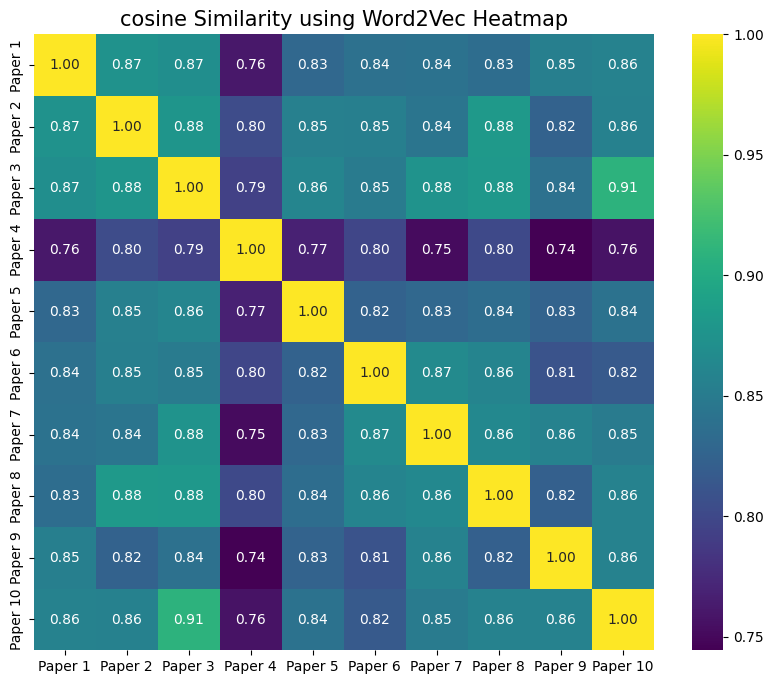

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the heatmap with custom labels
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="viridis", fmt=".2f", cbar=True,
            xticklabels=[f'Paper {i+1}' for i in range(len(similarity_matrix))],
            yticklabels=[f'Paper {i+1}' for i in range(len(similarity_matrix))])

plt.title("cosine Similarity using Word2Vec Heatmap", fontsize=15, loc='center')
plt.show()